In [38]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_USA = df[df['job_country'] == 'United States']
df_skills = df_USA.explode('job_skills')

In [4]:
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,r,"{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


In [5]:
df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skills_count')
df_skills_count = df_skills_count.sort_values(by='skills_count' ,ascending=False)
df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [10]:
job_title = df_skills_count['job_title_short'].unique().tolist()
job_title = sorted(job_title[0:3])
job_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

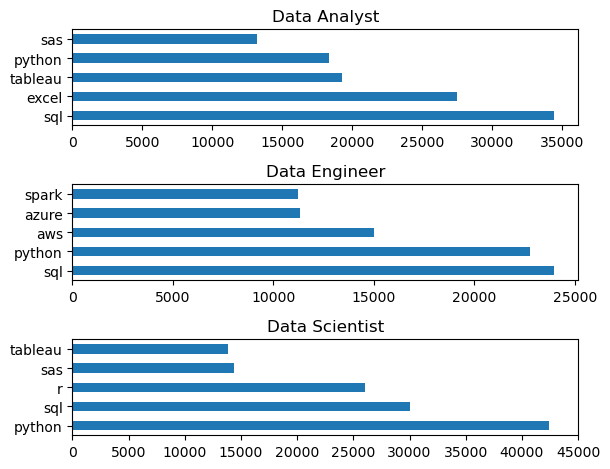

In [20]:
fig , ax = plt.subplots(len(job_title),1)

for i ,job in enumerate(job_title):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job].head(5)
    df_plot.plot(kind='barh', x='job_skills' , y='skills_count',ax=ax[i],title = job)
    plt.tight_layout()
    ax[i].set_ylabel('')
    plt.xlim(0,45000)
    ax[i].legend().remove()

In [28]:
df_job_title_count = df_USA['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [31]:
df_skill_per = pd.merge(df_skills_count , df_job_title_count , how='left', on='job_title_short')



df_skill_per

,job_skills,job_title_short,skills_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [32]:
df_skill_per['skills_percent'] = (df_skill_per['skills_count']/df_skill_per['jobs_total']) * 100

df_skill_per

,job_skills,job_title_short,skills_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


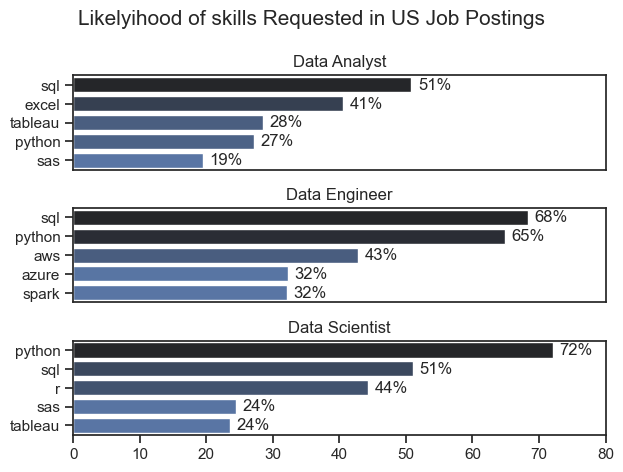

In [64]:
fig , ax = plt.subplots(len(job_title),1)

sns.set_theme(style='ticks')

for i ,job in enumerate(job_title):
    df_plot = df_skill_per[df_skill_per['job_title_short'] == job].head(5)
    # df_plot.plot(kind='barh', x='job_skills' , y='skills_percent',ax=ax[i],title = job)
    sns.barplot(data=df_plot,x='skills_percent' , y='job_skills' , hue= 'skills_count', ax=ax[i], palette='dark:b_r')
    ax[i].set_title(job)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,80)

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
    if i != len(job_title)-1:  
        ax[i].set_xticks([])
fig.suptitle('Likelyihood of skills Requested in US Job Postings',fontsize= 15)
plt.tight_layout()
plt.show()